In [6]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
def larger_model():
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = larger_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
300/300 [==============================] - 35s 117ms/step - loss: 0.3811 - accuracy: 0.8826 - val_loss: 0.0965 - val_accuracy: 0.9702
Epoch 2/20
300/300 [==============================] - 35s 116ms/step - loss: 0.1053 - accuracy: 0.9682 - val_loss: 0.0584 - val_accuracy: 0.9797
Epoch 3/20
300/300 [==============================] - 35s 117ms/step - loss: 0.0761 - accuracy: 0.9764 - val_loss: 0.0429 - val_accuracy: 0.9862
Epoch 4/20
300/300 [==============================] - 35s 117ms/step - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.0405 - val_accuracy: 0.9867
Epoch 5/20
300/300 [==============================] - 35s 117ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0340 - val_accuracy: 0.9894
Epoch 6/20
300/300 [==============================] - 35s 117ms/step - loss: 0.0451 - accuracy: 0.9853 - val_loss: 0.0348 - val_accuracy: 0.9886
Epoch 7/20
300/300 [==============================] - 35s 117ms/step - loss: 0.0410 - accuracy: 0.9867 - val_loss: 0.0284 - val_ac

In [7]:
def history_vizualization(history):
  fig, ax = plt.subplots(2, 1, figsize=(15, 8))
  ax[0].plot(history.history['accuracy'])
  ax[0].plot(history.history['val_accuracy'])
  ax[0].set_title('Model accuracy')
  ax[0].set_ylabel('Accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].legend(['Train', 'Test'], loc='upper left')
 
  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'])
  ax[1].set_title('Model loss')
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epoch')
  ax[1].legend(['Train', 'Test'], loc='upper left')

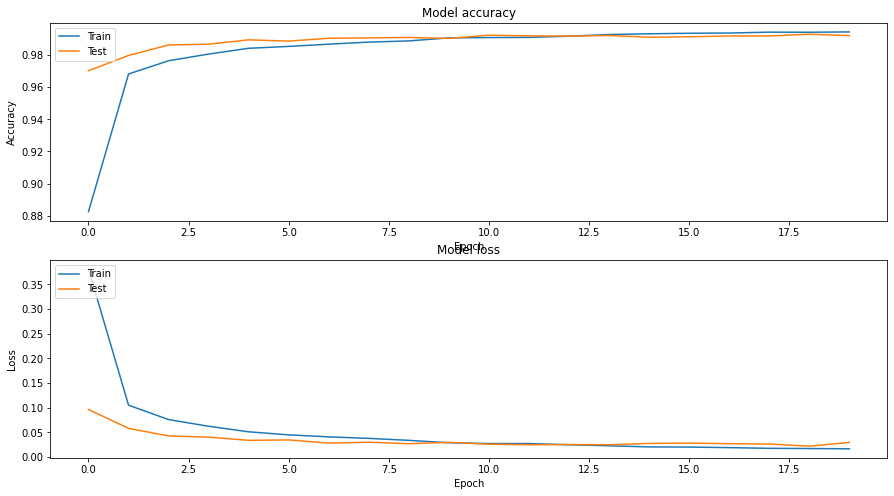

In [8]:
history_vizualization(history)

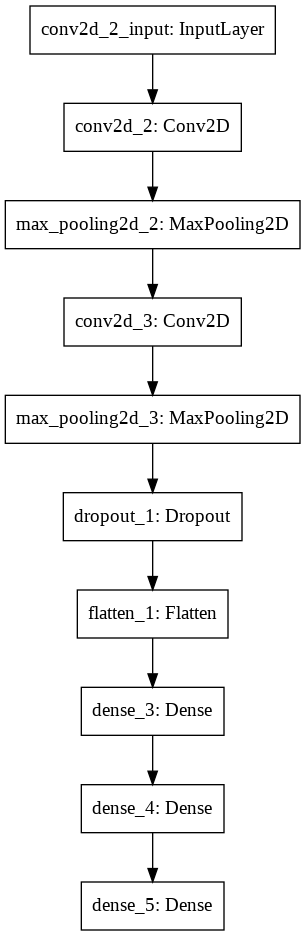

In [9]:
from keras.utils import plot_model
plot_model(model)